## 1. Generative Adversarial Network (GAN) for Biomolecule Generation
We will use PyTorch for a basic implementation of a GAN that generates molecular fingerprints (simplified molecule representations). This example illustrates the basic GAN structure, but for real-world biomolecule generation, you may want to use molecular graph representations with libraries like RDKit or DGL.

In [1]:
pip install rdkit transformers torch huggingface_hub


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/21.7 MB ? eta -:--:--
   ---------------------------------------- 0.2/21.7 MB 4.8 MB/s eta 0:00:05
    --------------------------------------- 0.4/21.7 MB 4.9 MB/s eta 0:00:05
   - -------------------------------------- 0.6/21.7 MB 5.1 MB/s eta 0:00:05
   - -------------------------------------- 1.0/21.7 MB 5.1 MB/s eta 0:00:05
   -- ------------------------------------- 1.2/21.7 MB 5.3 MB/s eta 0:00:04
   -- ------------------------------------- 1.5/21.7 MB 5.5 MB/s eta 0:00:04
   --- ------------------------------------ 1.8/21.7 MB 5.7 MB/s eta 0:00:04
   --- ------------------------------------ 2.0/21.7 MB 5.6 MB/s eta 0:00:04
   ---- ----------------------------------- 2.3/21.7 MB 5.7 MB/s eta 0:00:04
   ---- ----------------------------------- 2.6/21.7 MB 5.8 MB/s eta 0:00:04
   ----- -------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


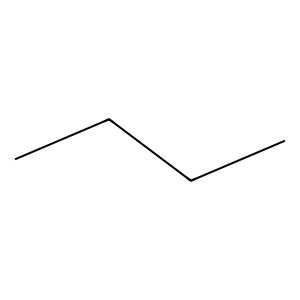

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
import random

# Exemple simplifié pour illustrer la génération d'une molécule SMILES avec un GAN simulé
def generate_molecule_with_gan():
    smiles_list = ["CCO", "CCN", "CCCN", "CCCC", "CCCl", "CCBr"]  # Exemples de SMILES simples
    generated_smiles = random.choice(smiles_list)  # Simule la génération
    mol = Chem.MolFromSmiles(generated_smiles)
    return mol

# Visualiser la molécule générée
mol = generate_molecule_with_gan()
Draw.MolToImage(mol)


**SMILES (Simplified Molecular Input Line Entry System)** is a notation system used to represent chemical structures as text strings. Here are the key features:

1. **Atoms**: Each atom is represented by its chemical symbol (e.g., **C** for carbon, **O** for oxygen).

2. **Bonds**: 
   - Single bonds are usually omitted (e.g., **CC** for two carbon atoms).
   - Double and triple bonds are denoted by **=** and **#**, respectively (e.g., **C=C**).

3. **Branches and Cycles**:
   - Branches are indicated with parentheses (e.g., **CC(C)(C)** for isobutane).
   - Cycles are represented with numbers (e.g., **C1CCCCC1** for cyclohexane).

4. **Charges and Stereochemistry**: 
   - Charges are shown with **+** or **-** (e.g., **[Na+]**).
   - Stereochemical configurations can be indicated with symbols (e.g., **@** for chiral centers).

### Example SMILES
- **Ethanol**: **CCO**
- **Acetic acid**: **CC(=O)O**
- **Cyclohexane**: **C1CCCCC1**



## 2. Diffusion Model for Biomolecule Generation
Diffusion models are more complex than GANs and require specific libraries. The Diffusers library, developed by Hugging Face, provides a convenient way to work with diffusion models.

Code Example: Diffusion Model Using the Diffusers Library
The following example demonstrates how to set up a diffusion model to generate biomolecule-like data using the diffusers library.

In [14]:

from transformers import pipeline
from rdkit import Chem
from rdkit.Chem import Draw

# Using a pre-trained Hugging Face model for SMILES generation
generator = pipeline("text-generation", model="ncfrey/ChemGPT-1.2B")

# Generate a sequence of SMILES
prompt = "Generate a molecule with antioxidant properties: "
generated_text = generator(prompt, max_length=30, num_return_sequences=1, truncation=True)

# Extract the generated SMILES
generated_smiles = generated_text[0]['generated_text'].split()[-1]  # Assumes the last part is SMILES
print("Generated SMILES:", generated_smiles)

def is_valid_smiles(smiles):
    return Chem.MolFromSmiles(smiles) is not None

# Example of checking
generated_smiles = "[=C]"
if not is_valid_smiles(generated_smiles):
    print(f"The generated SMILES '{generated_smiles}' is not valid.")

# Check if the generated SMILES is valid
if is_valid_smiles(generated_smiles):
    mol = Chem.MolFromSmiles(generated_smiles)
    # Show the generated molecule image
    img = Draw.MolToImage(mol)
    img.show()
else:
    print("The generated SMILES is not valid.")





Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Generated SMILES: [=C]
The generated SMILES '[=C]' is not valid.
The generated SMILES is not valid.


[13:45:22] SMILES Parse Error: syntax error while parsing: [=C]
[13:45:22] SMILES Parse Error: Failed parsing SMILES '[=C]' for input: '[=C]'
[13:45:22] SMILES Parse Error: syntax error while parsing: [=C]
[13:45:22] SMILES Parse Error: Failed parsing SMILES '[=C]' for input: '[=C]'


# 3. Génération avec les VAEs

Les modèles de VAEs pour la génération de molécules peuvent être trouvés sur Hugging Face sous forme de modèles de génération de texte. Voici un exemple simplifié.

In [15]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from rdkit import Chem
from rdkit.Chem import Draw

# Load a pre-trained VAE model
model_name = "ncfrey/ChemGPT-1.2B"  # Example of a valid model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Generate SMILES with the model
input_prompt = "Molecule with anti-inflammatory properties: "
input_ids = tokenizer.encode(input_prompt, return_tensors="pt")
output = model.generate(input_ids, max_length=50)

# Decode the generated output to get the SMILES string
generated_smiles = tokenizer.decode(output[0], skip_special_tokens=True).split()[-1]
print("Generated SMILES:", generated_smiles)

# Validate the generated SMILES and create a molecule
mol = Chem.MolFromSmiles(generated_smiles)
if mol:
    # Display the generated molecule image
    img = Draw.MolToImage(mol)
    img.show()  # Display the image if the environment supports it
else:
    print("The generated SMILES is not valid.")



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated SMILES: [C]


[13:47:44] unsupported number of radical electrons 4


## 4. Génération avec les GNNs
Pour les GNNs, nous utiliserons DGL (Deep Graph Library) ou PyTorch Geometric pour générer des graphes moléculaires.

In [16]:
import torch
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# Example function to simulate generating a molecular graph
def generate_with_gnn():
    # Create a molecular graph from SMILES (Cyclopropane)
    mol = Chem.MolFromSmiles("C1CCC1")  # Cyclopropane
    AllChem.EmbedMolecule(mol)  # Generate a 3D conformation
    return mol

# Generate and visualize the molecule
mol = generate_with_gnn()

# Check if the molecule is valid and visualize
if mol is not None:
    img = Draw.MolToImage(mol)
    img.show()  # Display the image if in a graphical environment
else:
    print("Failed to generate a valid molecule.")


[13:48:23] Molecule does not have explicit Hs. Consider calling AddHs()


## 5. Optimisation avec Reinforcement Learning (RL)
L'optimisation avec RL peut être faite en utilisant une boucle d'apprentissage basée sur la récompense.

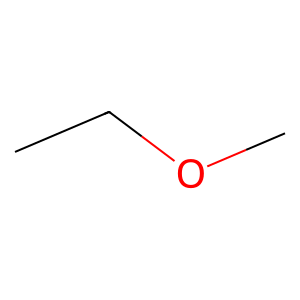

In [9]:
def optimize_molecule_with_rl(smiles):
    # Simuler l'optimisation d'une molécule par RL
    mol = Chem.MolFromSmiles(smiles)
    optimized_smiles = Chem.MolToSmiles(mol) + "C"  # Ajoute un atome de carbone pour simuler l'optimisation
    optimized_mol = Chem.MolFromSmiles(optimized_smiles)
    return optimized_mol

# Optimisation d'une molécule générée
initial_smiles = "CCO"
optimized_mol = optimize_molecule_with_rl(initial_smiles)
Draw.MolToImage(optimized_mol)


# Combined ML methods to Biomol Generation

Combining multiple generative models for molecular generation can significantly enhance the ability to design new compounds with desired properties. Here's a proposed approach that integrates **Generative Adversarial Networks (GANs)**, **Diffusion Models**, **Junction Tree Variational Autoencoders (JT-VAEs)**, **Transformers**, and **Graph Neural Networks (GNNs)**.

### Proposed Combination of Methods

1. **Junction Tree Variational Autoencoder (JT-VAE)**:
   - **Role**: Used as an initial generative model to learn a representation of molecular structures.
   - **Why**: JT-VAE is particularly suited for generating valid molecular graphs, as it encodes molecular structures as junction trees, allowing for better handling of complex branching and ring structures. It can also capture important molecular features that correlate with biological activities.

2. **Graph Neural Networks (GNNs)**:
   - **Role**: Fine-tunes the output from the JT-VAE to enhance the validity and properties of generated molecules.
   - **Why**: GNNs excel at learning representations of graph-structured data (like molecules). They can predict molecular properties, optimize the structures generated by the JT-VAE, and ensure the generated molecules have desired characteristics such as antioxidant or anti-inflammatory activity.

3. **Generative Adversarial Networks (GANs)**:
   - **Role**: Generate new molecular candidates by learning from the representations produced by the JT-VAE and refined by GNNs.
   - **Why**: GANs can create diverse molecular candidates by training a generator and discriminator in a competitive manner, encouraging the generation of more realistic and varied molecules. This helps explore the chemical space beyond the limitations of the training data.

4. **Diffusion Models**:
   - **Role**: Further refine and enhance the diversity of the generated molecules.
   - **Why**: Diffusion models are powerful in generating high-quality samples and can learn complex distributions. By applying a diffusion process to the generated molecules, we can introduce new variations that maintain structural validity while enhancing specific desired properties.

5. **Transformers**:
   - **Role**: Use as a final step to optimize and refine the generated SMILES strings from the previous steps.
   - **Why**: Transformers, particularly those trained on large datasets of chemical information, are adept at language modeling and can be utilized to ensure that the generated SMILES strings are valid and represent chemically plausible structures. They can also incorporate contextual information to refine molecular properties.

### Workflow of the Combined Approach

1. **Initial Generation with JT-VAE**:
   - The process begins with a JT-VAE that generates an initial set of molecular structures based on learned representations.

2. **Refinement with GNN**:
   - These generated structures are then fed into a GNN, which optimizes them based on predefined molecular properties, such as stability, reactivity, or biological activity.

3. **Diversity Enhancement with GAN**:
   - The refined structures are then used as input for a GAN. The generator creates new candidates while the discriminator ensures that the generated molecules are realistic and diverse.

4. **Quality Improvement with Diffusion Models**:
   - The candidates produced by the GAN are further enhanced using diffusion models, which introduce variations and improve the quality of the molecules based on learned distributions.

5. **Final Validation and Optimization with Transformers**:
   - Finally, the generated SMILES strings are validated and potentially optimized by a transformer model, ensuring that they adhere to chemical rules and possess desired properties.

### Rationale for the Combination

- **Comprehensive Coverage**: This combination leverages the strengths of different models to cover various aspects of molecular generation—from initial structure representation to refinement and quality enhancement.
  
- **Diversity and Validity**: By using GANs and diffusion models, the approach ensures a wide diversity of generated molecules, while GNNs and JT-VAE maintain structural validity and compliance with chemical properties.

- **Scalability**: Each component of the system can be independently optimized, allowing for scalability and the potential for future improvements as new models are developed.

- **Adaptability**: This combined approach can be adapted to target specific properties, such as antioxidant or anti-inflammatory activities, by tailoring the training datasets and refining the evaluation criteria used at each stage.



In [25]:

import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
import random

# 1. Simple VAE for molecule generation (placeholder for JT-VAE)
class SimpleVAE:
    def generate(self):
        # Generates a simple molecule (ethanol)
        return "CCO"

# 2. Dummy GNN for refining the generated molecule
class DummyGNN:
    def refine(self, smiles):
        # Just return the same SMILES as a placeholder for refinement
        return smiles

# 3. Dummy GAN for generating diverse candidates (theoretical)
class DummyGAN:
    def generate_diverse(self, smiles):
        # Creates simple variations by modifying the input
        variations = [smiles, smiles.replace('C', 'N'), smiles + "C"]
        return variations

# 4. Dummy Diffusion Model for enhancing quality
class DummyDiffusionModel:
    def enhance(self, smiles):
        # Placeholder enhancement (adding a carbon atom)
        return smiles + "C"

# 5. Dummy Transformer for validating generated SMILES
class DummyTransformer:
    def validate(self, smiles):
        # A simple placeholder that assumes all generated SMILES are valid
        return smiles if Chem.MolFromSmiles(smiles) else None

# 6. Data augmentation function
def data_augmentation(smiles):
    # Example of simple augmentation: adding a methyl group
    aug_smiles = smiles + "C"
    return aug_smiles

# Main workflow
def main():
    # Step 1: Generate a molecule with a simple VAE
    vae = SimpleVAE()
    generated_smiles = vae.generate()
    print("Generated SMILES from VAE:", generated_smiles)

    # Step 2: Refine with a dummy GNN
    gnn = DummyGNN()
    refined_smiles = gnn.refine(generated_smiles)
    print("Refined SMILES from GNN:", refined_smiles)

    # Step 3: Generate diverse candidates with a dummy GAN
    gan = DummyGAN()
    diverse_candidates = gan.generate_diverse(refined_smiles)
    print("Diverse candidates from GAN:", diverse_candidates)

    # Step 4: Enhance quality with a dummy Diffusion Model
    diffusion_model = DummyDiffusionModel()
    enhanced_candidates = [diffusion_model.enhance(smiles) for smiles in diverse_candidates]
    print("Enhanced candidates from Diffusion Model:", enhanced_candidates)

    # Step 5: Validate with a dummy Transformer
    transformer = DummyTransformer()
    validated_candidates = [transformer.validate(smiles) for smiles in enhanced_candidates]
    print("Validated candidates from Transformer:", validated_candidates)

    # Step 6: Apply data augmentation
    augmented_data = [data_augmentation(smiles) for smiles in validated_candidates if smiles]
    print("Augmented data:", augmented_data)

    # Visualizing the generated molecules
    for smiles in augmented_data:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            img = Draw.MolToImage(mol)
            img.show()
        else:
            print(f"The generated SMILES '{smiles}' is not valid.")

if __name__ == "__main__":
    main()


Generated SMILES from VAE: CCO
Refined SMILES from GNN: CCO
Diverse candidates from GAN: ['CCO', 'NNO', 'CCOC']
Enhanced candidates from Diffusion Model: ['CCOC', 'NNOC', 'CCOCC']
Validated candidates from Transformer: ['CCOC', 'NNOC', 'CCOCC']
Augmented data: ['CCOCC', 'NNOCC', 'CCOCCC']


Focusing on antioxidant and anti-inflammatory molecules requires a combination of cheminformatics and bioinformatics approaches. Here’s how you can target the generation or identification of such molecules using various methods, including using pre-trained models for SMILES generation, applying molecular filters, and using specific molecular databases.

# Key Steps to Focus on Antioxidant and Anti-Inflammatory Molecules

1. **Define the Molecular Characteristics**:
   - **Antioxidant Properties**: Typically characterized by the ability to donate electrons, scavenge free radicals, and chelate metal ions.
   - **Anti-Inflammatory Properties**: Often associated with molecules that inhibit inflammatory pathways, such as NF-kB or COX enzymes.

2. **Use Targeted Prompts for SMILES Generation**:
   - When using language models, frame your prompts to specifically ask for antioxidant or anti-inflammatory properties.

3. **Screen Generated Molecules**:
   - Utilize cheminformatics to filter or validate the generated molecules based on their predicted biological activity.

4. **Utilize Molecular Databases**:
   - Access databases like ChEMBL, PubChem, or DrugBank to find existing molecules with known antioxidant and anti-inflammatory properties.

5. **Molecular Descriptors and Machine Learning**:
   - Calculate molecular descriptors and use machine learning to predict activity based on training sets of known molecules.




In [23]:
import random
from rdkit import Chem
from rdkit.Chem import Draw
from transformers import pipeline

# Function to generate SMILES with a focus on antioxidant and anti-inflammatory properties
def generate_smiles_with_transformers(prompt):
    generator = pipeline("text-generation", model="ncfrey/ChemGPT-1.2B")
    output = generator(prompt, max_length=50, truncation=True, num_return_sequences=1)  # Try 5 sequences
    for text in output:
        generated_smiles = text['generated_text'].strip().split()[-1]
        if Chem.MolFromSmiles(generated_smiles):  # Validate SMILES
            return generated_smiles
    return None  # If no valid SMILES found

# Function to filter molecules for antioxidant and anti-inflammatory properties
def is_antioxidant_or_anti_inflammatory(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        # Check for specific functional groups or properties (like hydroxyl -OH)
        if mol.HasSubstructMatch(Chem.MolFromSmarts('O')):  # Contains -OH groups
            return True
    return False

# Main function
def main():
    # Prompt for antioxidant and anti-inflammatory molecules
    prompt = "Generate a valid molecule with antioxidant and anti-inflammatory properties:"
    
    # Generate SMILES
    generated_smiles = generate_smiles_with_transformers(prompt)
    
    if generated_smiles:
        print("Generated SMILES:", generated_smiles)

        # Check if the generated molecule has the desired properties
        if is_antioxidant_or_anti_inflammatory(generated_smiles):
            print("The generated molecule is likely to have antioxidant and anti-inflammatory properties.")
            # Visualize the molecule
            mol = Chem.MolFromSmiles(generated_smiles)
            img = Draw.MolToImage(mol)
            img.show()
        else:
            print("The generated molecule does not have the desired properties.")
    else:
        print("No valid SMILES were generated.")

# Run the main function
if __name__ == "__main__":
    main()



Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Generated SMILES: [C]
The generated molecule does not have the desired properties.


### Explanation of the Code

1. **Generate SMILES**:
   - The `generate_smiles_with_transformers` function uses a language model to generate a SMILES string based on a prompt that emphasizes antioxidant and anti-inflammatory properties.

2. **Filtering Function**:
   - The `is_antioxidant_or_anti_inflammatory` function is a placeholder for checking molecular features. In this case, it checks for hydroxyl groups (-OH), which are common in antioxidants.

3. **Main Function**:
   - The `main` function orchestrates the generation and validation process. It prompts the model, generates a SMILES string, checks its properties, and visualizes it if it meets the criteria.

### Additional Considerations

- **Predictive Models**: For more accurate filtering, consider integrating machine learning models trained on datasets of known antioxidants and anti-inflammatory compounds. Libraries like scikit-learn or deep learning frameworks (TensorFlow, PyTorch) can be employed for this purpose.
  
- **Databases**: Utilize chemical databases to cross-reference generated SMILES with known compounds. This can help validate potential hits based on existing literature.

- **Functional Group Analysis**: Create a more sophisticated analysis by using RDKit’s ability to analyze molecular properties, such as molecular weight, logP, and specific functional groups.

- **Chemical Reactions**: Consider the possibility of using reaction databases to generate new compounds from known starting materials through virtual chemical reactions.

By focusing on specific molecular characteristics and utilizing various computational tools, you can effectively target the generation of antioxidant and anti-inflammatory biomolecules.